In [22]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np


In [23]:
import datasets as ds
# Hacky way to handle the naming converntion issue, this code will not work on Windows
ds.builder.INVALID_WINDOWS_CHARACTERS_IN_PATH = ''

In [24]:
dataset_name = "xiaozheyao/btc_perf"
request_rates = [1, 2, 5, 10, 20, 40, 60, 80, 100]

# Kernel Comparison

## 1xH100

In [25]:
kernels = [
  "1xH100 | llama_moe_unquantized",
  "1xH100 | llama_moe_linear_naive", 
  "1xH100 | llama_moe_sbmm_naive", 
  "1xH100 | llama_moe_sbmm_forloop", 
  "1xH100 | llama_moe_sbmm_multilaunch"
]
dataset = {kernel : load_dataset(dataset_name, kernel) for kernel in kernels}

README.md:   0%|          | 0.00/114k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/18 [00:00<?, ? examples/s]

In [26]:
data = {}
metric = "mean_e2el_ms"
for kernel in kernels:
  rows = dataset[kernel]["train"]
  data_kernel = {}
  for row in rows:
    data_kernel[int(row["client_args"]["request_rate"])] = row["metrics"]["mean_e2el_ms"]
  data[kernel] = data_kernel

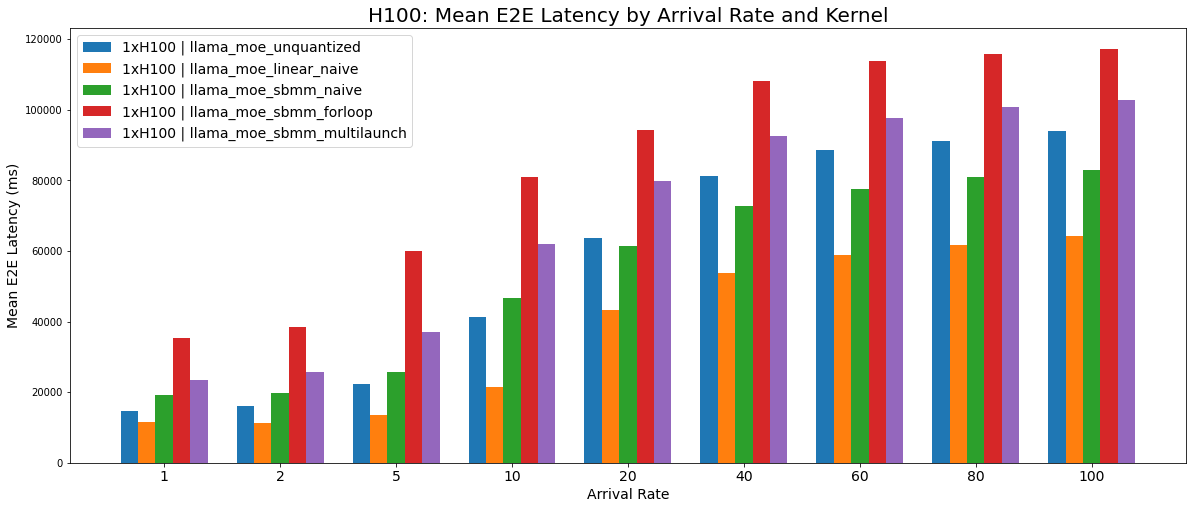

In [27]:
x_labels = sorted(request_rates)
x = np.arange(len(x_labels))
width = 0.15

fig, ax = plt.subplots(figsize=(20,8))
for i, (kernel, values) in enumerate(data.items()):
    y = [values.get(rate, 0) for rate in x_labels]
    ax.bar(x + i * width, y, width, label=kernel)

ax.set_xlabel('Arrival Rate', fontsize=14)
ax.set_ylabel('Mean E2E Latency (ms)', fontsize=14)
ax.set_title('H100: Mean E2E Latency by Arrival Rate and Kernel', fontsize=20)
ax.set_xticks(x + width * (len(data) - 1) / 2, labels=x_labels, fontsize=14)
ax.set_xticklabels(x_labels)
ax.legend(fontsize=14)

plt.show()


Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

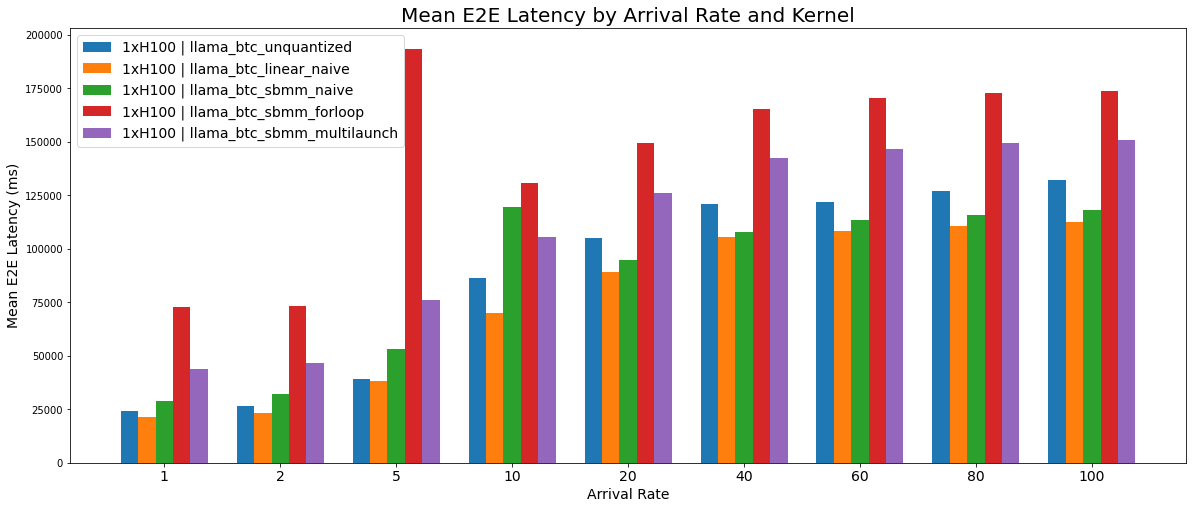

In [28]:
kernels = [
  "1xH100 | llama_btc_unquantized", 
  "1xH100 | llama_btc_linear_naive", 
  "1xH100 | llama_btc_sbmm_naive", 
  "1xH100 | llama_btc_sbmm_forloop", 
  "1xH100 | llama_btc_sbmm_multilaunch"
]
dataset = {kernel : load_dataset(dataset_name, kernel) for kernel in kernels}
data = {}
metric = "mean_e2el_ms"
for kernel in kernels:
  rows = dataset[kernel]["train"]
  data_kernel = {}
  for row in rows:
    data_kernel[int(row["client_args"]["request_rate"])] = row["metrics"]["mean_e2el_ms"]
  data[kernel] = data_kernel
x_labels = sorted(request_rates)
x = np.arange(len(x_labels))

width = 0.15
fig, ax = plt.subplots(figsize=(20,8))
for i, (kernel, values) in enumerate(data.items()):
    y = [values.get(rate, 0) for rate in x_labels]
    ax.bar(x + i * width, y, width, label=kernel)

ax.set_xlabel('Arrival Rate', fontsize=14)
ax.set_ylabel('Mean E2E Latency (ms)', fontsize=14)
ax.set_title('Mean E2E Latency by Arrival Rate and Kernel', fontsize=20)
ax.set_xticks(x + width * (len(data) - 1) / 2, labels=x_labels, fontsize=14)
ax.set_xticklabels(x_labels)
ax.legend(fontsize=14)
plt.show()

## 1xA100

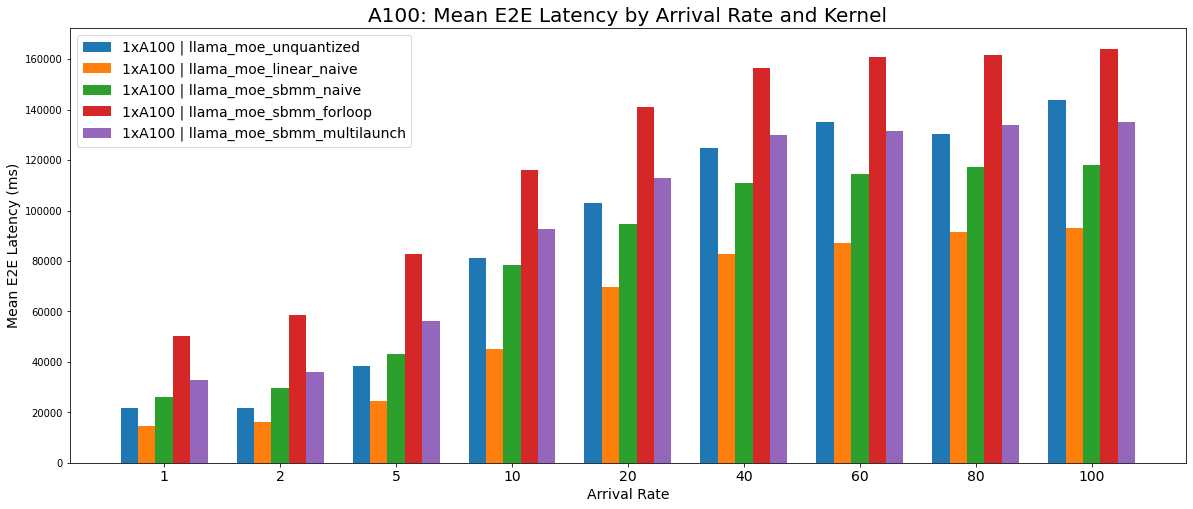

In [31]:
kernels = [
  "1xA100 | llama_moe_unquantized",
  "1xA100 | llama_moe_linear_naive", 
  "1xA100 | llama_moe_sbmm_naive", 
  "1xA100 | llama_moe_sbmm_forloop", 
  "1xA100 | llama_moe_sbmm_multilaunch"
]
dataset = {kernel : load_dataset(dataset_name, kernel) for kernel in kernels}
data = {}
metric = "mean_e2el_ms"
for kernel in kernels:
  rows = dataset[kernel]["train"]
  data_kernel = {}
  for row in rows:
    data_kernel[int(row["client_args"]["request_rate"])] = row["metrics"]["mean_e2el_ms"]
  data[kernel] = data_kernel
x_labels = sorted(request_rates)
x = np.arange(len(x_labels))
width = 0.15

fig, ax = plt.subplots(figsize=(20,8))
for i, (kernel, values) in enumerate(data.items()):
    y = [values.get(rate, 0) for rate in x_labels]
    ax.bar(x + i * width, y, width, label=kernel)

ax.set_xlabel('Arrival Rate', fontsize=14)
ax.set_ylabel('Mean E2E Latency (ms)', fontsize=14)
ax.set_title('A100: Mean E2E Latency by Arrival Rate and Kernel', fontsize=20)
ax.set_xticks(x + width * (len(data) - 1) / 2, labels=x_labels, fontsize=14)
ax.set_xticklabels(x_labels)
ax.legend(fontsize=14)
plt.show()

Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/9 [00:00<?, ? examples/s]

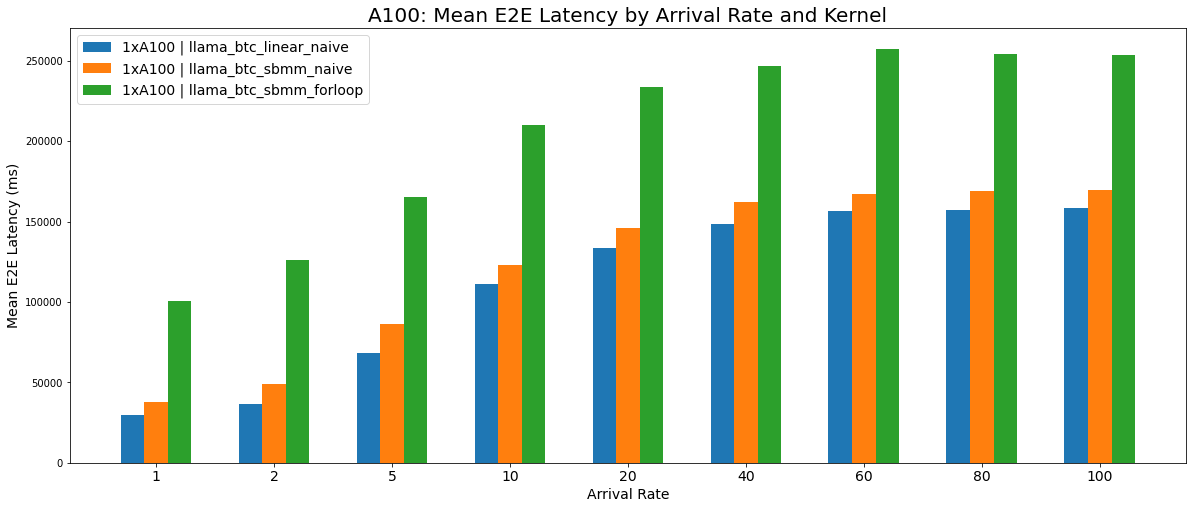

In [30]:
kernels = [
  "1xA100 | llama_btc_linear_naive", 
  "1xA100 | llama_btc_sbmm_naive", 
  "1xA100 | llama_btc_sbmm_forloop", 
]
dataset = {kernel : load_dataset(dataset_name, kernel) for kernel in kernels}
data = {}
metric = "mean_e2el_ms"
for kernel in kernels:
  rows = dataset[kernel]["train"]
  data_kernel = {}
  for row in rows:
    data_kernel[int(row["client_args"]["request_rate"])] = row["metrics"]["mean_e2el_ms"]
  data[kernel] = data_kernel
x_labels = sorted(request_rates)
x = np.arange(len(x_labels))

width = 0.20
fig, ax = plt.subplots(figsize=(20,8))
for i, (kernel, values) in enumerate(data.items()):
    y = [values.get(rate, 0) for rate in x_labels]
    ax.bar(x + i * width, y, width, label=kernel)

ax.set_xlabel('Arrival Rate', fontsize=14)
ax.set_ylabel('Mean E2E Latency (ms)', fontsize=14)
ax.set_title('A100: Mean E2E Latency by Arrival Rate and Kernel', fontsize=20)
ax.set_xticks(x + width * (len(data) - 1) / 2, labels=x_labels, fontsize=14)
ax.set_xticklabels(x_labels)
ax.legend(fontsize=14)
plt.show()